In [61]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import uuid

# Cấu hình
start_date = datetime(2024, 5, 20)  # 1 năm từ ngày hiện tại
end_date = start_date + timedelta(days=365)
time_interval = timedelta(hours=1)  # mỗi giờ một mẫu

device_ids = ['C1', 'C2', 'C3']
locations = len(device_ids)

# Các dịp đặc biệt (lưu lượng tăng cao)
special_dates = [
    datetime(2024, 9, 2),   # Quốc khánh
    datetime(2025, 2, 1),   # Gần Tết Âm lịch
    datetime(2024, 12, 25), # Giáng sinh
]

# Hàm sinh dữ liệu cho từng thời điểm
def generate_entry(timestamp, device_id):
    # Kiểm tra mùa hè (nhiều mưa hơn)
    is_summer = timestamp.month in [6, 7, 8]
    is_rain = np.random.rand() < (0.3 if is_summer else 0.1)

    # Tăng lưu lượng vào dịp đặc biệt
    is_special = any(abs((timestamp.date() - d.date()).days) <= 1 for d in special_dates)
    base_traffic = 100 if is_special else 50

    # Tăng nhẹ vào giờ cao điểm (7-9h, 16-18h)
    hour = timestamp.hour
    if 7 <= hour <= 9 or 16 <= hour <= 18:
        base_traffic += 20

    # Cuối tuần
    if timestamp.weekday() >= 5:
        base_traffic += 10

    # Lưu lượng ngẫu nhiên trong khoảng
    num_total = int(np.clip(np.random.normal(base_traffic, 15), 0, 300))

    # all_green_time phụ thuộc vào lưu lượng: mỗi xe khoảng 2s, ngẫu nhiên một chút
    all_green_time = int(num_total * np.random.uniform(1.8, 2.2))

    # Số lần bật đèn xanh (giả định chia trung bình 1 lần mỗi giờ, ngẫu nhiên)
    numb_turn_green = random.randint(1, 3)
    average_green_time = all_green_time // numb_turn_green if numb_turn_green > 0 else 0

    return {
        "_id": uuid.uuid4().hex,
        "device_id": device_id,
        "rain": is_rain,
        "mode": 0,
        "auto_mode": True,
        "timestamp": timestamp.isoformat(),
        "num_total": num_total,
        "all_green_time": all_green_time,
        "numb_turn_green": numb_turn_green,
        "average_green_time": average_green_time
    }

# Tạo dữ liệu
timestamps = pd.date_range(start=start_date, end=end_date, freq=time_interval)
data = []

for timestamp in timestamps:
    for device_id in device_ids:
        data.append(generate_entry(timestamp, device_id))

df = pd.DataFrame(data)
df.head()


,_id,device_id,rain,mode,auto_mode,timestamp,num_total,all_green_time,numb_turn_green,average_green_time
0,69471c3df54248e0bde76f6491c36df7,C1,False,0,True,2024-05-20T00:00:00,50,108,2,54
1,88d7ec9a6aaf48d889f76f0ecbea5d11,C2,False,0,True,2024-05-20T00:00:00,40,86,2,43
2,2639f716ae4b4afb86d1f5bdff0fc0db,C3,False,0,True,2024-05-20T00:00:00,67,128,1,128
3,a499746ba1f74bfca88fdcc6089c479e,C1,False,0,True,2024-05-20T01:00:00,45,83,1,83
4,6d7f34effb7f42bfbc269af3834f8677,C2,False,0,True,2024-05-20T01:00:00,28,51,1,51


In [62]:
df.to_json("data.json", orient="records", indent=2)
# Lưu dữ liệu vào file JSON

In [49]:
df

,_id,device_id,rain,mode,auto_mode,timestamp,num_total,all_green_time,numb_turn_green,average_green_time
0,9c450490c2e8442880367bd51885cf93,C1,False,0,True,2024-05-20T00:00:00,91,181,2,90
1,435f71e75ecb48a2b1516ef1fee4ffc7,C2,False,0,True,2024-05-20T00:00:00,51,106,3,35
2,8895f117f2dc4e7899e486060df0781c,C3,False,0,True,2024-05-20T00:00:00,50,93,2,46
3,3b82a21743784360b47181e40602f2b4,C1,False,0,True,2024-05-20T01:00:00,47,102,2,51
4,8196fe57493e44898f2436f7d59407c9,C2,False,0,True,2024-05-20T01:00:00,48,104,2,52
...,...,...,...,...,...,...,...,...,...,...
26278,0b059bb23572478c9e78ac8da5193a1e,C2,False,0,True,2025-05-19T23:00:00,52,99,3,33
26279,9f6baf0a43064794be335bc00f4873d2,C3,True,0,True,2025-05-19T23:00:00,51,100,2,50
26280,af4de7cace314bd88921376574aad9c3,C1,False,0,True,2025-05-20T00:00:00,43,93,3,31
26281,73e2c0d70a7f48f298a4718326c50b75,C2,False,0,True,2025-05-20T00:00:00,33,64,2,32


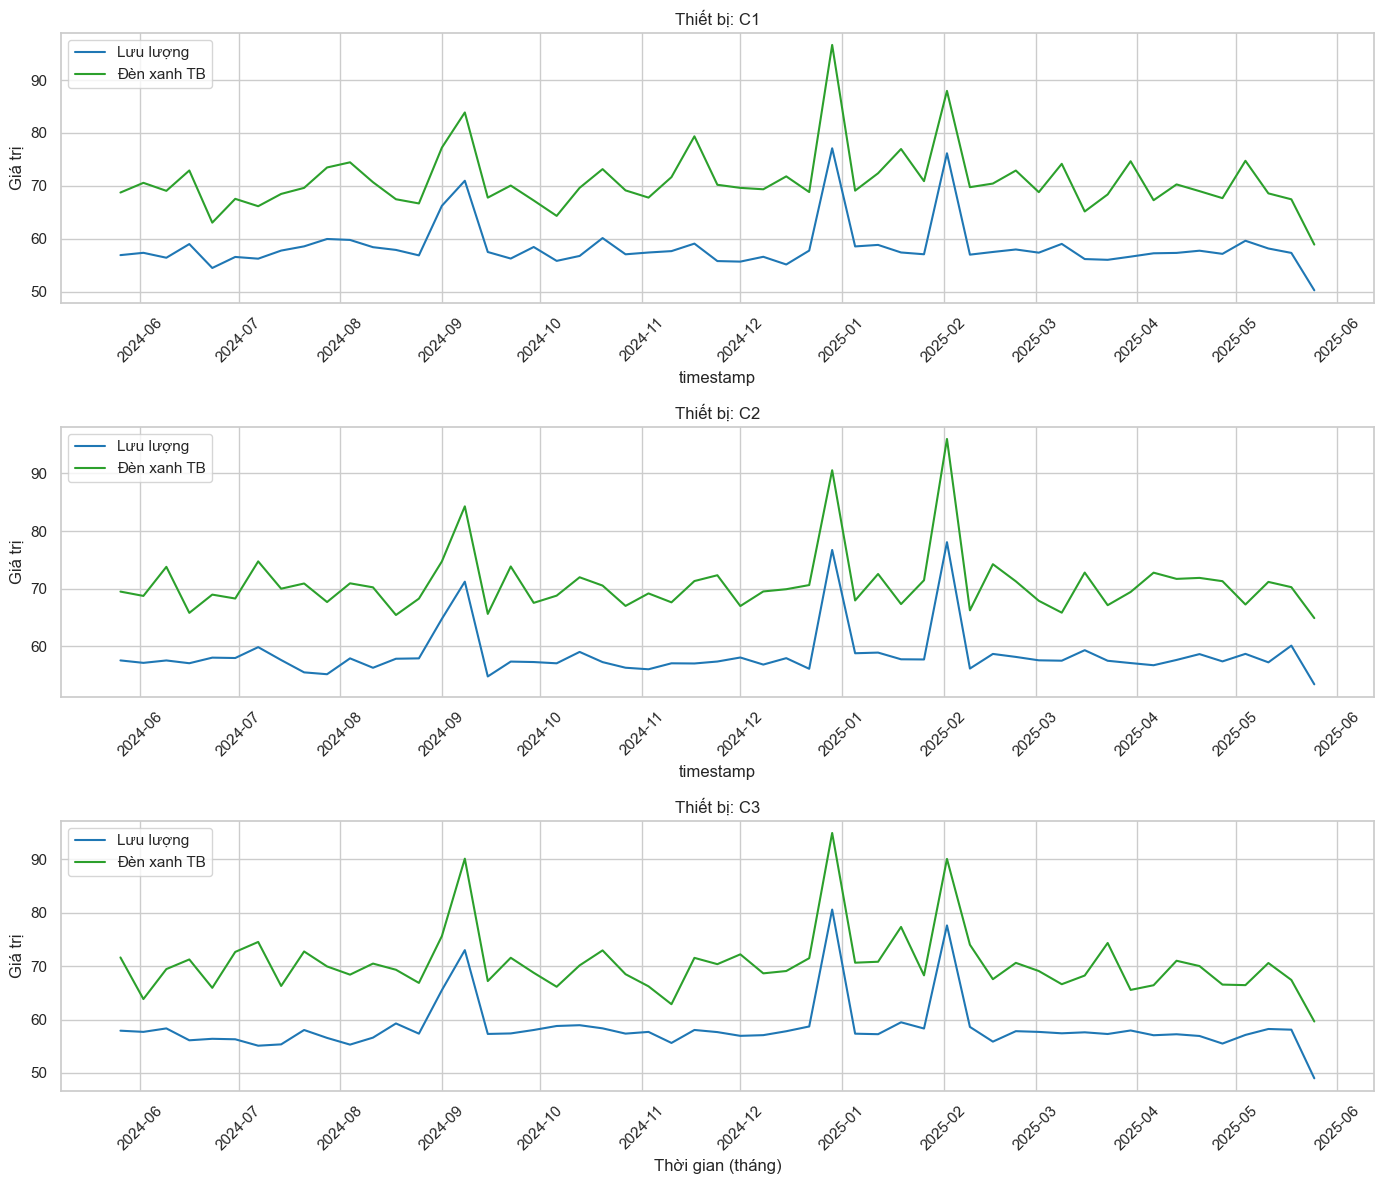

In [50]:
# Nạp lại dữ liệu vì biến df và df_resampled chưa tồn tại sau lần reset trước đó
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Chuyển timestamp thành datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Resample theo tuần và tính trung bình
df_resampled = df.set_index('timestamp').groupby('device_id').resample('W').mean(numeric_only=True).reset_index()

# Thiết lập style
sns.set(style="whitegrid")

# Vẽ biểu đồ cho từng thiết bị
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12), sharex=False)

for ax, device_id in zip(axes, df['device_id'].unique()):
    group = df_resampled[df_resampled['device_id'] == device_id]

    # Vẽ dữ liệu
    sns.lineplot(data=group, x='timestamp', y='num_total', label='Lưu lượng', ax=ax, color='tab:blue')
    sns.lineplot(data=group, x='timestamp', y='average_green_time', label='Đèn xanh TB', ax=ax, color='tab:green')

    # Cấu hình trục X để hiển thị tháng và năm rõ ràng
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.tick_params(axis='x', rotation=45)

    ax.set_ylabel("Giá trị")
    ax.set_title(f"Thiết bị: {device_id}")
    ax.legend(loc='upper left')

plt.xlabel("Thời gian (tháng)")
plt.tight_layout()
plt.show()


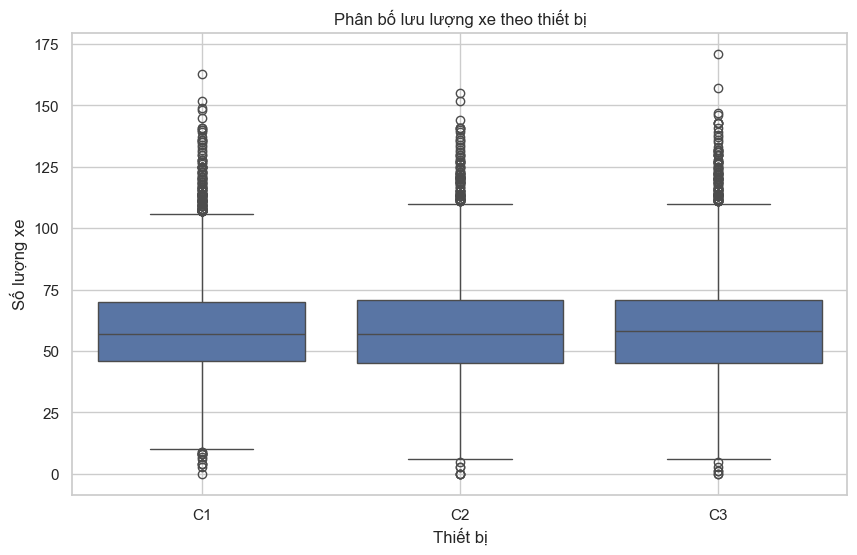

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='device_id', y='num_total')
plt.title("Phân bố lưu lượng xe theo thiết bị")
plt.ylabel("Số lượng xe")
plt.xlabel("Thiết bị")
plt.grid(True)
plt.show()


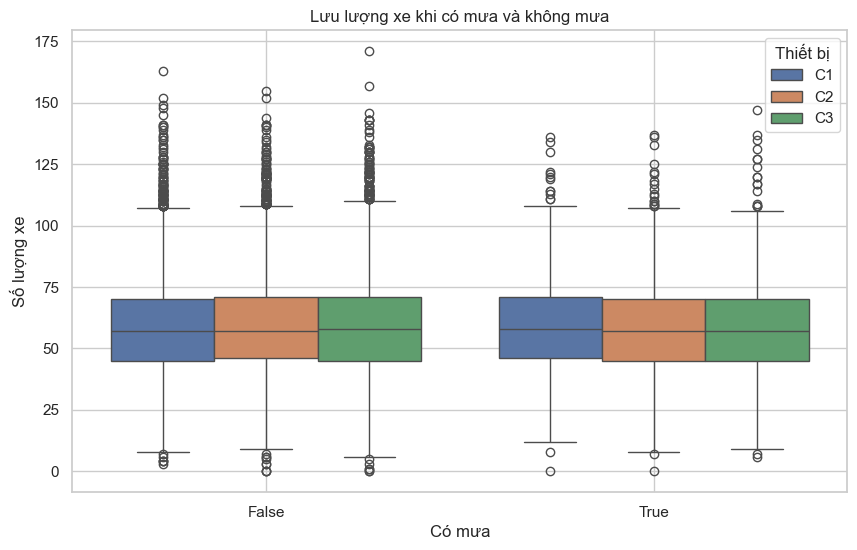

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rain', y='num_total', hue='device_id')
plt.title("Lưu lượng xe khi có mưa và không mưa")
plt.xlabel("Có mưa")
plt.ylabel("Số lượng xe")
plt.legend(title="Thiết bị")
plt.grid(True)
plt.show()


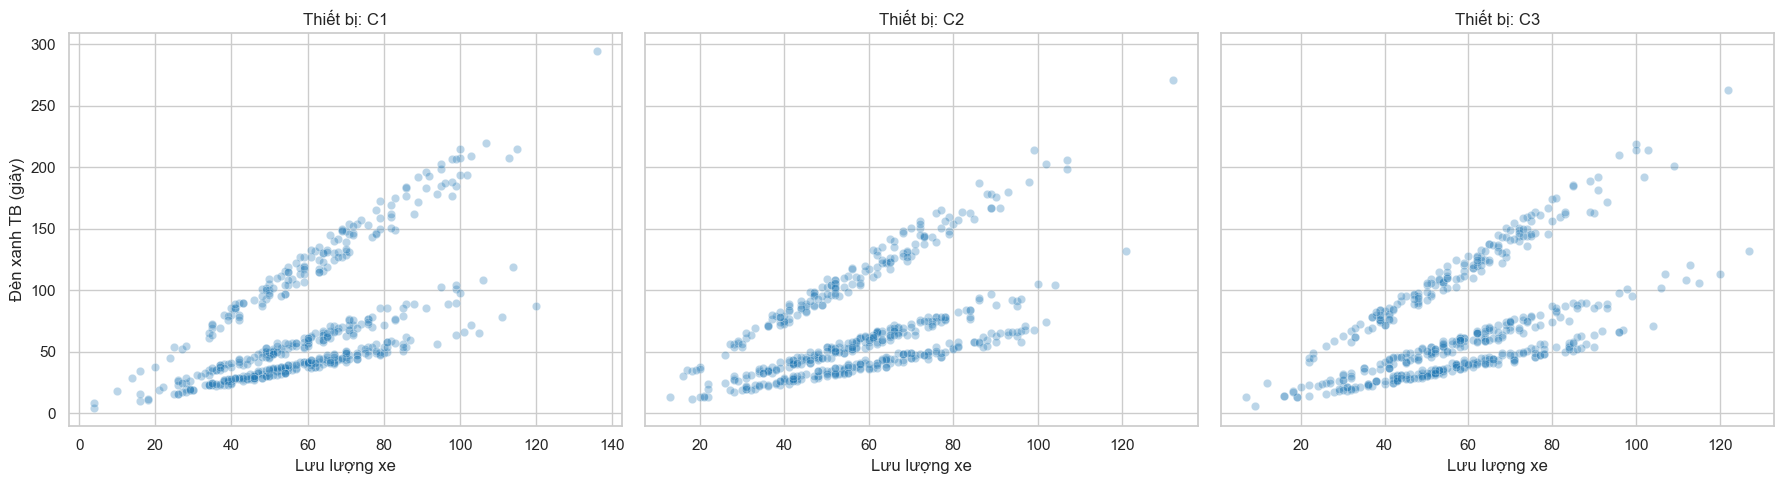

In [53]:

# Thiết lập style
sns.set(style="whitegrid")

# Tạo khung biểu đồ với số lượng cột = số lượng thiết bị
device_ids = df['device_id'].unique()
num_devices = len(device_ids)

fig, axes = plt.subplots(nrows=1, ncols=num_devices, figsize=(6 * num_devices, 5), sharey=True)

# Nếu chỉ có 1 thiết bị, axes không phải là list => ép thành list để dễ xử lý
if num_devices == 1:
    axes = [axes]

# Lặp qua từng thiết bị và vẽ scatter plot riêng
for ax, device_id in zip(axes, device_ids):
    # Lấy mẫu 1000 dòng (hoặc ít hơn nếu dữ liệu ít)
    df_sampled = df[df['device_id'] == device_id].sample(n=min(500, len(df[df['device_id'] == device_id])), random_state=42)

    sns.scatterplot(
        data=df_sampled,
        x='num_total',
        y='average_green_time',
        alpha=0.3,
        ax=ax,
        color='tab:blue'
    )

    ax.set_title(f"Thiết bị: {device_id}")
    ax.set_xlabel("Lưu lượng xe")
    ax.set_ylabel("Đèn xanh TB (giây)")
    ax.grid(True)

plt.tight_layout()
plt.show()

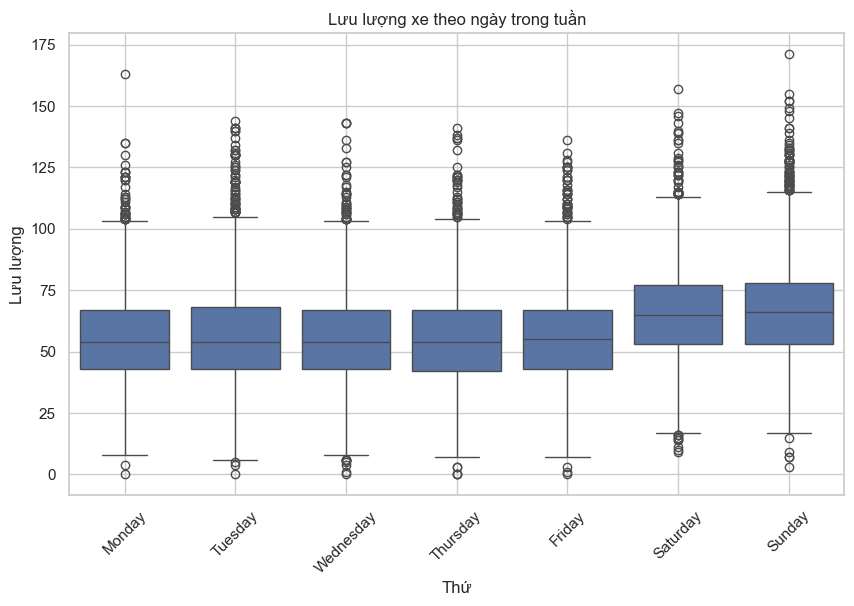

In [54]:
df['weekday'] = df['timestamp'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weekday', y='num_total', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Lưu lượng xe theo ngày trong tuần")
plt.xticks(rotation=45)
plt.ylabel("Lưu lượng")
plt.xlabel("Thứ")
plt.grid(True)
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4768\1430147403.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='hour', y='num_total', hue='device_id', ci='sd')


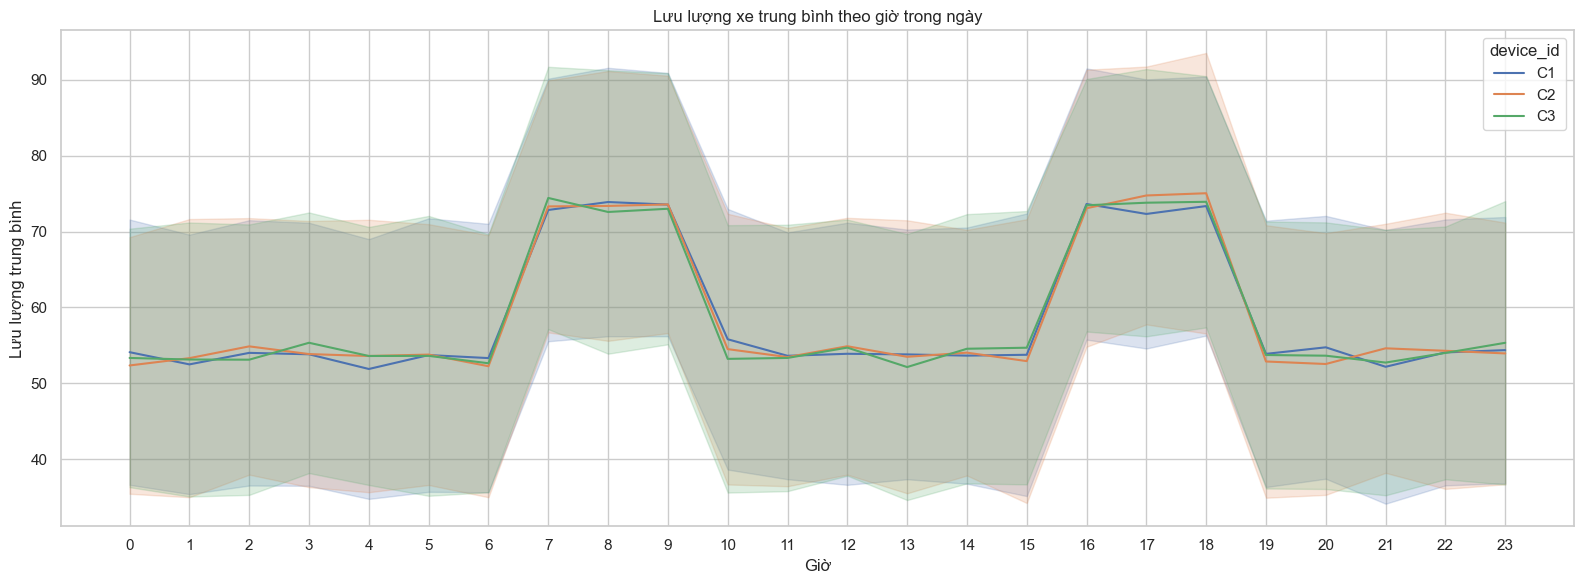

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Đảm bảo đã có cột hour
df['hour'] = df['timestamp'].dt.hour

# Đảm bảo đủ 24 giờ trên trục X
hours = list(range(24))

plt.figure(figsize=(16, 6))  # Tăng chiều ngang từ 12 → 16
sns.lineplot(data=df, x='hour', y='num_total', hue='device_id', ci='sd')

plt.title("Lưu lượng xe trung bình theo giờ trong ngày")
plt.xlabel("Giờ")
plt.ylabel("Lưu lượng trung bình")
plt.xticks(hours)  # Đảm bảo hiển thị đủ 0 đến 23
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4768\3373787865.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='hour', y='average_green_time', hue='device_id', ci='sd')


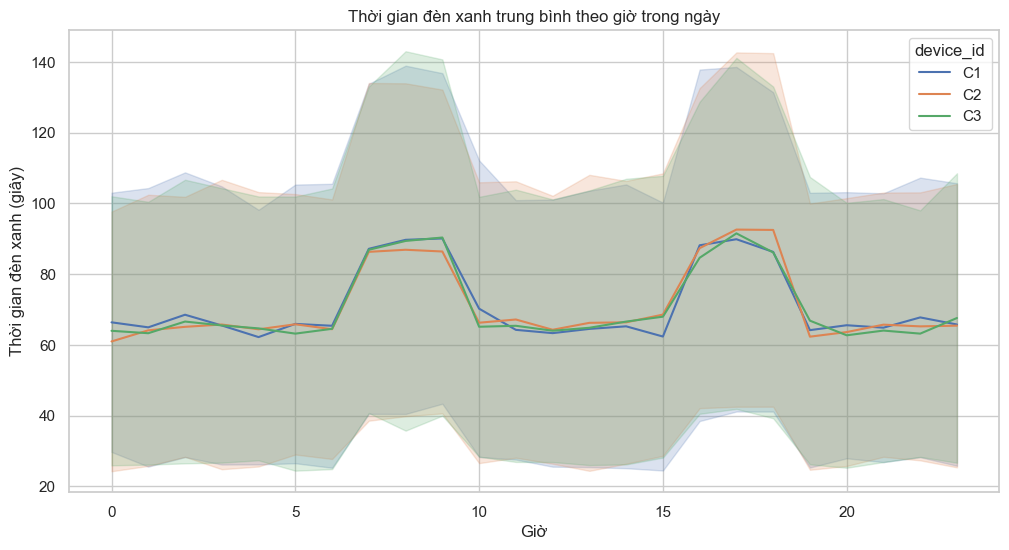

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='average_green_time', hue='device_id', ci='sd')
plt.title("Thời gian đèn xanh trung bình theo giờ trong ngày")
plt.xlabel("Giờ")
plt.ylabel("Thời gian đèn xanh (giây)")
plt.grid(True)
plt.show()


In [ ]:
import torch

print("PyTorch version:", torch.__version__)

# Kiểm tra GPU
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Số lượng GPU:", torch.cuda.device_count())
    print("Tên GPU:", torch.cuda.get_device_name(0))
    print("CUDA version:", torch.version.cuda)
    print("cuDNN version:", torch.backends.cudnn.version())
else:
    print("Không tìm thấy GPU CUDA.")


PyTorch version: 2.5.1
CUDA available: True
Số lượng GPU: 1
Tên GPU: NVIDIA GeForce RTX 3050 Laptop GPU
CUDA version: 12.1
cuDNN version: 90100


In [ ]:
%pip install scikit-learn tensorflow


  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached grpcio-1.71.0-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached h5py-3.13.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-0.5.1-cp310-cp310-win_amd64.whl.metadata (22 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached optree-0.15.0-cp310-cp

In [ ]:
import sklearn
import tensorflow as tf

print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)


scikit-learn version: 1.6.1
TensorFlow version: 2.19.0


In [ ]:
from matplotlib.pyplot import show
import pip
import tensorflow


%pip show tensorflow


Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\admin\anaconda3\envs\backend_da\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys
print(sys.executable)


c:\Users\ADMIN\anaconda3\envs\backend_da\python.exe


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
Available GPUs: []


In [58]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

# Giả sử df đã có sẵn như bạn tạo từ đoạn sinh dữ liệu

# 1. Chuyển timestamp về datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Lọc theo device_id (ví dụ 'C1')
device_id = 'C1'
df_dev = df[df['device_id'] == device_id].copy()

# 3. Sắp xếp theo thời gian (quan trọng)
df_dev.sort_values('timestamp', inplace=True)
df_dev.reset_index(drop=True, inplace=True)

# 4. Tạo các cột thời gian
df_dev['hour'] = df_dev['timestamp'].dt.hour
df_dev['weekday'] = df_dev['timestamp'].dt.weekday
df_dev['is_weekend'] = (df_dev['weekday'] >= 5).astype(int)

# 5. Chọn feature có tương quan
features = [
    'num_total',
    'all_green_time',
    'average_green_time',
    'rain',
    'hour',
    'weekday',
    'is_weekend'
]

# Đảm bảo kiểu dữ liệu số
df_dev['rain'] = df_dev['rain'].astype(int)

data_features = df_dev[features].values.astype(np.float32)

# 6. Scale dữ liệu về 0-1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_features)

# 7. Tạo chuỗi input (24 bước) và output (1 bước tiếp theo của num_total)
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # target: num_total (feature index 0)
    return np.array(X), np.array(y)

SEQ_LENGTH = 24
X_np, y_np = create_sequences(data_scaled, SEQ_LENGTH)

# 8. Chuyển sang tensor
X_tensor = torch.tensor(X_np, dtype=torch.float32)
y_tensor = torch.tensor(y_np, dtype=torch.float32).unsqueeze(1)

# 9. Chia train/test theo thời gian (80% train, 20% test)
split_idx = int(len(X_tensor) * 0.8)
X_train, X_test = X_tensor[:split_idx], X_tensor[split_idx:]
y_train, y_test = y_tensor[:split_idx], y_tensor[split_idx:]

# 10. DataLoader, không shuffle để giữ tính liên tục
BATCH_SIZE = 32
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

# 11. Định nghĩa mô hình LSTM với dropout
class TrafficLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, dropout=0.2):
        super(TrafficLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = TrafficLSTM(input_size=len(features)).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 12. Huấn luyện (có early stopping đơn giản)
EPOCHS = 50
patience = 5
best_loss = np.inf
trigger_times = 0

for epoch in range(EPOCHS):
    model.train()
    train_losses = []
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        output = model(xb)
        loss = criterion(output, yb)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    model.eval()
    val_losses = []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            output = model(xb)
            loss = criterion(output, yb)
            val_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    val_loss = np.mean(val_losses)
    print(f"Epoch {epoch+1} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

    if val_loss < best_loss:
        best_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), "best_traffic_lstm.pth")
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered.")
            break

# 13. Đánh giá kết quả
model.load_state_dict(torch.load("best_traffic_lstm.pth"))
model.eval()

predictions = []
actuals = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        output = model(xb).cpu().numpy()
        predictions.extend(output.flatten())
        actuals.extend(yb.numpy().flatten())

# Hàm inverse transform cho feature num_total (index 0)
def inverse_transform(scaled_vals, scaler, feature_idx=0):
    dummy = np.zeros((len(scaled_vals), scaler.scale_.shape[0]))
    dummy[:, feature_idx] = scaled_vals
    inv = scaler.inverse_transform(dummy)
    return inv[:, feature_idx]

pred_inv = inverse_transform(np.array(predictions), scaler, 0)
actual_inv = inverse_transform(np.array(actuals), scaler, 0)

# So sánh thực tế và dự đoán
for i in range(5):
    print(f"Thực tế: {actual_inv[i]:.1f} - Dự đoán: {pred_inv[i]:.1f}")


Using device: cuda
Epoch 1 - Train Loss: 0.0173 - Val Loss: 0.0116
Epoch 2 - Train Loss: 0.0150 - Val Loss: 0.0116
Epoch 3 - Train Loss: 0.0143 - Val Loss: 0.0113
Epoch 4 - Train Loss: 0.0139 - Val Loss: 0.0113
Epoch 5 - Train Loss: 0.0135 - Val Loss: 0.0109
Epoch 6 - Train Loss: 0.0125 - Val Loss: 0.0095
Epoch 7 - Train Loss: 0.0118 - Val Loss: 0.0093
Epoch 8 - Train Loss: 0.0104 - Val Loss: 0.0091
Epoch 9 - Train Loss: 0.0106 - Val Loss: 0.0090
Epoch 10 - Train Loss: 0.0101 - Val Loss: 0.0090
Epoch 11 - Train Loss: 0.0099 - Val Loss: 0.0089
Epoch 12 - Train Loss: 0.0099 - Val Loss: 0.0090
Epoch 13 - Train Loss: 0.0103 - Val Loss: 0.0089
Epoch 14 - Train Loss: 0.0097 - Val Loss: 0.0089
Epoch 15 - Train Loss: 0.0097 - Val Loss: 0.0089
Epoch 16 - Train Loss: 0.0099 - Val Loss: 0.0089
Epoch 17 - Train Loss: 0.0099 - Val Loss: 0.0089
Epoch 18 - Train Loss: 0.0095 - Val Loss: 0.0089
Epoch 19 - Train Loss: 0.0094 - Val Loss: 0.0088
Epoch 20 - Train Loss: 0.0095 - Val Loss: 0.0090
Epoch 21 -

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4768\1880577820.py:139: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_traffic_lstm.pth"))


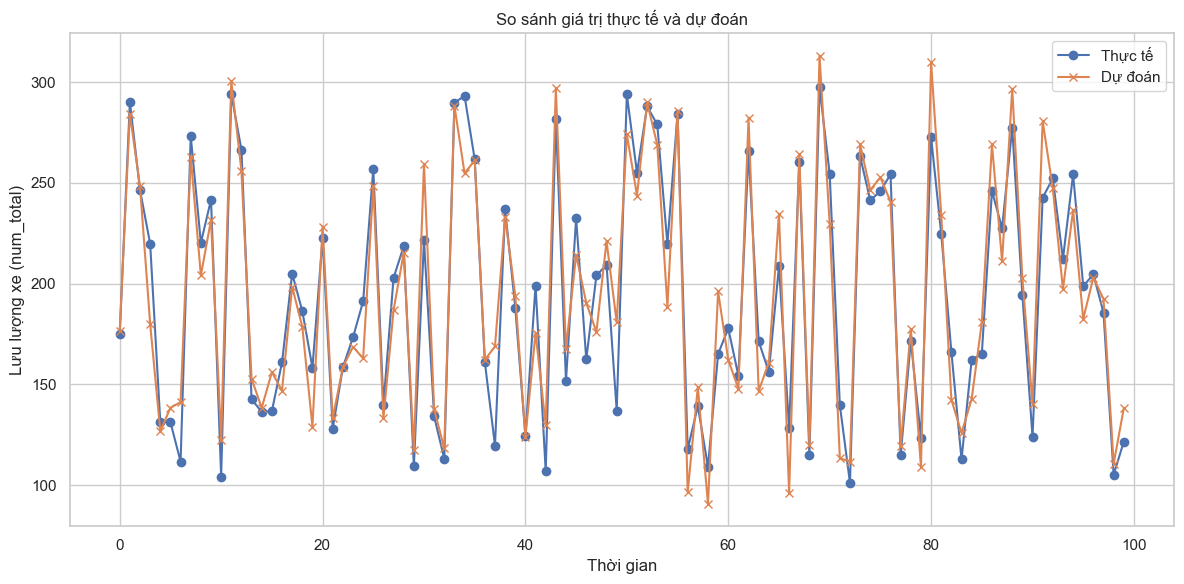

In [ ]:
# Chạy lại sau khi reset kernel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Giả lập dữ liệu (thay bằng actual_inv và pred_inv trong thực tế)
np.random.seed(42)
actual_inv = np.random.uniform(100, 300, 100)
pred_inv = actual_inv + np.random.normal(0, 20, 100)  # có nhiễu

# Tính toán độ chính xác
mse = mean_squared_error(actual_inv, pred_inv)
mae = mean_absolute_error(actual_inv, pred_inv)
r2 = r2_score(actual_inv, pred_inv)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(actual_inv, label='Thực tế', marker='o')
plt.plot(pred_inv, label='Dự đoán', marker='x')
plt.title('So sánh giá trị thực tế và dự đoán')
plt.xlabel('Thời gian')
plt.ylabel('Lưu lượng xe (num_total)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Giả sử đã có actual_inv và pred_inv từ mô hình dự đoán
mse = mean_squared_error(actual_inv, pred_inv)
mae = mean_absolute_error(actual_inv, pred_inv)
r2 = r2_score(actual_inv, pred_inv)

mse, mae, r2


(330.0427119631753, 14.4223262590936, 0.9058258004700179)

In [64]:
torch.save(model.state_dict(), "predict_traffic_lstm.pth")

In [65]:
import pickle

with open("traffic_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)